<a href="https://colab.research.google.com/github/hevertonvalerio/Challenge/blob/main/challenge_modelo_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

#### **5. Aprendizado de Máquina**
---

Neste capítulo você irá aprender:

1. O que é o Aprendizado de Máquina Supervisionado
2. Como aplicar modelos Aprendizado de Máquina para estimar Funções e Séries Temporais com os estimadores do `Scikit-Learn`
2. E como podem ser empregados modelos de Deep Learning para previsão de Séries Temporais a partir de um exemplo com `PyTorch`




Modelos de Aprendizado de Máquina, ou ML (*Machine Learning*), são aplicados a uma série de tarefas como identificação de fraudes em cartões de crédito e a recomendação de produtos no *e-commerce*, até sistemas para precificação e a previsão do tempo.

Esses modelos também vêm sendo aplicados com sucesso na previsão de Séries Temporais bastante complexas. Eles não têm a necessidade de assumir modelos aditivos ou multiplicativos, e nem eliminar tendências ou sazonalidades para serem aplicados. São bastante fáceis de usar estimando um grande conjunto de Séries com pouca ou quase nenhuma informação sobre sua estrutura (tendência, sazonalidade, periodicidade etc.), embora, essa falta de poder explicativo dos modelos de ML seja em muitos casos uma desvantagem desses modelos.

Apesar deste texto ser uma introdução ao tema de Séries Temporais, o uso recentes desses modelos vem crescendo em vários seguimentos, da predição de demanda de produtos à aplicações em ciência, telecomunicações e medicina, com soluções suportadas por grandes empresas de tecnologia como Meta (`Prophet`,`Neuralprophet`, `PyTorch`) e Google (`TensorFlow`). Assim, incluímos este capítulo para você conhecer esses modelos e algumas de suas aplicações, mesmo sendo um conteúdo que você não irá encontrar nos textos mais tradicionais da área.








In [ ]:
##@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path_data = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/tsp.mplstyle' ])

## Para ver os parâmetros empregados aqui
## plt.rcParams
## plt.rcParams['figure.figsize']

In [ ]:
##Backup

##bikes = pd.read_csv(path_data + 'dados_bike.csv')
##df = bikes.copy()
##df.head()


----

In [ ]:
import yfinance as yf

In [ ]:
avir_df = yf.download('LMND', start = '2024-01-02')

avir_df = avir_df[['Close']].rename(columns = {'Close':'AVIR'})

avir_df.index = pd.to_datetime(avir_df.index, format = '%Y-%m-%d')

avir_df.head()

[*********************100%***********************]  1 of 1 completed


,AVIR
Date,
2024-01-02,17.040001
2024-01-03,16.219999
2024-01-04,16.610001
2024-01-05,16.549999
2024-01-08,18.250000


A série de dados que temos interesse é agora a dos valores `cnt`, valores máximos de demanda de bicicletas por dia e representada pela linha amarela no gráfico abaixo.

In [ ]:
bikes = avir_df[['AVIR']].rename(columns = {'AVIR':'cnt'})


In [ ]:
bikes.head()

,cnt
Date,
2024-01-02,17.040001
2024-01-03,16.219999
2024-01-04,16.610001
2024-01-05,16.549999
2024-01-08,18.250000


In [ ]:
##Backup


##sns.lineplot(x = df.cnt.index, y = df.cnt)

##plt.title('AVIRSharing Demanding', fontsize=14, weight='bold')
##plt.xlabel('Days')
##plt.ylabel('Bike Demands')
##plt.show()

###### Modelo ARIMA

Vamos recordar que chegamos ao seguinte modelo ARIMA e forecasting para os 20% dados finais da Série (Conjunto de Teste) nos capítulos anteriores:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
df = bikes.copy()

In [ ]:
df = df[['cnt']]
df.columns = ['value']
df = df.reset_index(drop=True)


In [ ]:
test_size = int(0.2*len(df))
train_size = len(df) - test_size

## Create Training and Test
train = df.value[:train_size]
test = df.value[train_size:]

In [ ]:
p = 7
d = 2
q = 1

model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  160
Model:                 ARIMA(7, 2, 1)   Log Likelihood                -202.169
Date:                Tue, 15 Oct 2024   AIC                            422.339
Time:                        20:48:52   BIC                            449.902
Sample:                             0   HQIC                           433.532
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0324      0.088     -0.370      0.712      -0.204       0.139
ar.L2         -0.0793      0.082     -0.963      0.336      -0.241       0.082
ar.L3         -0.0238      0.157     -0.151      0.8

In [ ]:
history = [x for x in train]
predictions = list()

## forward validation
for t in test.index:
  ## print(t)
	model = ARIMA(history, order=(7,2,1))
	model_fit = model.fit( )
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
##@markdown
def plot_forecast(y, y_pred, X_train, title='Forecasting'):

  plt.plot(y, alpha=0.3, label='Real', color='k')
  plt.plot(y_pred, alpha=0.7, label='Forecast', color='k', linestyle='--')

  plt.plot(y_pred[0:X_train.shape[0]], alpha=0.9, label='Predicted', color='k', linestyle=':')

  plt.vlines(x=y.index[X_train.shape[0]] , ymin=0, ymax=y.max(), linestyle='--')

  plt.title(title)
  plt.xlabel('Days')
  plt.ylabel('Bike Demands')

  plt.text(100, 0 , '0.8, conjunto de treinamento')
  plt.text(300 , 0 , '0.2, de teste')
  plt.legend()
  plt.show()

  return

In [ ]:
##@markdown
## metrics
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual, print_flag=True):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  ## MAPE
    me = np.mean(forecast - actual)                           ## ME
    mae = np.mean(np.abs(forecast - actual))                  ## MAE
    mpe = np.mean((forecast - actual)/actual)                 ## MPE
    mse = np.mean((forecast - actual)**2)                     ## MSE
    rmse = np.mean((forecast - actual)**2)**.5                ## RMSE
    corr = np.corrcoef(forecast, actual)[0,1]                 ## CORR
    acf1 = acf(forecast - actual)[1]                          ## ACF1

    metrics = {'MSE':mse, 'MAPE':mape, 'ME':me, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse, 'ACF1':acf1, 'CORR':corr}

    if print_flag:
      for key, value in metrics.items():
        print(f'{key}: \t {value:.2f}')

    return metrics



# 1_

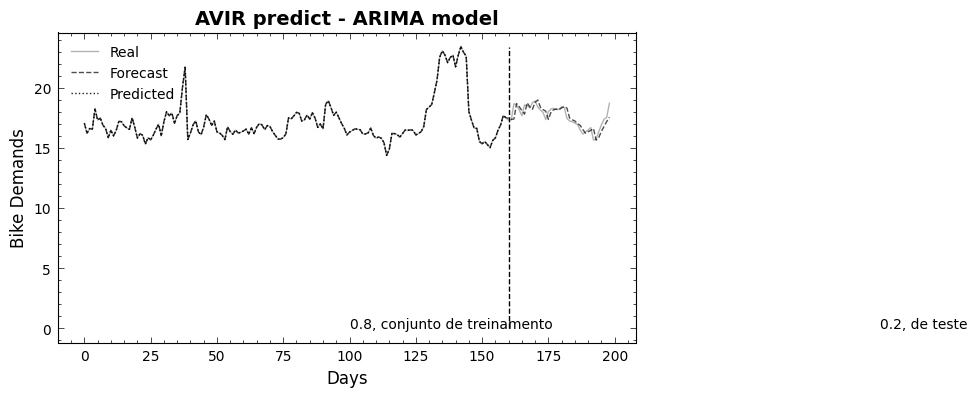

MSE: 	 0.23
MAPE: 	 0.02
ME: 	 -0.03
MAE: 	 0.36
MPE: 	 -0.00
RMSE: 	 0.48
ACF1: 	 0.12
CORR: 	 0.85


In [ ]:
y_pred = np.concatenate( (np.array( history[0:train_size] ).reshape(-1), np.array(predictions).reshape(-1)) )

plot_forecast(pd.DataFrame( history ), y_pred, np.array( history[0:train_size] ), title='AVIR predict - ARIMA model')
cur_metrics = forecast_accuracy(y_pred[train_size::], df[train_size::].values.reshape(-1))

dict_metrics = {}
dict_metrics['ARIMA Model'] = cur_metrics

#2

###### Modelo de Aprendizado de Máquina

Para o Aprendizado de Máquina vamos empregar duas funções, uma para criar o conjunto de entradas com os termos regressores da Séries (empregaremos 7 termos, no valendo da análise do modelo ARIMA anterior) e outra para separar o conjunto de Treinamento e Teste da Série. Empregaremos 20% dos dados mais recentes para o Teste de Previsão dos valores.

In [ ]:
def ml_timeseries_df(df, n_lags, prefix=''):

	df_ml = pd.DataFrame()

	for i in range(n_lags,0,-1):
		df_ml[prefix + 't-' + str(i)] = df.shift(i).values[:,0]
	df_ml['t'] = df.values[:,0]
	df_ml = df_ml[n_lags:]
	df_ml = df_ml.reset_index(drop=True)

	return df_ml

df = ml_timeseries_df(bikes[['cnt']], n_lags=7)
df.head()

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,17.040001,16.219999,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999
1,16.219999,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001
2,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000
3,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000,16.459999
4,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000,16.459999,16.000000


Organizado os dados desse modo podemos separar a primeira porção dos dados, $0.8$, para o treinamento do modelo e aplicarmos ao restante, $0.2$, o *forecasting* observando os resultados.

In [ ]:
def split_train_test(X, y, test_perc=0.2):

  test_size = int(len(df) * test_perc)
  train_size = len(df) - test_size

  X_train, y_train  = X[:train_size], y[:train_size]
  X_test, y_test = X[train_size:], y[train_size:]

  return X_train, y_train, X_test, y_test

X = df.drop(columns='t')
y = df[['t']]

X_train, y_train, X_test, y_test = split_train_test(X, y, test_perc=0.2)

O código para aplicação do Aprendizado de Máquina é o mesmo que empregamos antes e você pode empregar quaisquer dos regressores do `scikit_learn`.



######## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X)

#2_

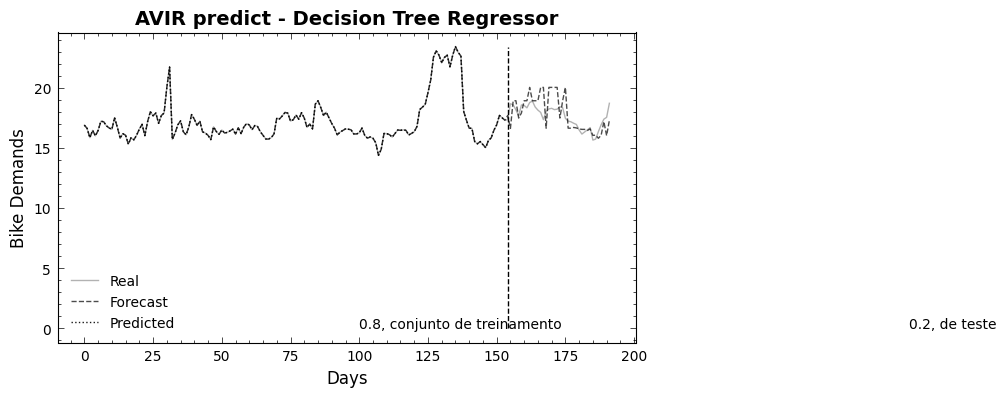

In [ ]:
plot_forecast(y, y_pred, X_train, title='AVIR predict - Decision Tree Regressor')

In [ ]:
cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['DecisionTreeRegressor'] = cur_metrics

MSE: 	 1.30
MAPE: 	 0.05
ME: 	 0.26
MAE: 	 0.88
MPE: 	 0.01
RMSE: 	 1.14
ACF1: 	 0.20
CORR: 	 0.66


# 3

######## XGBoost Regressor



In [ ]:
from xgboost.sklearn import XGBRegressor

reg =  XGBRegressor(random_state=0)
reg.fit(X_train,y_train.values.reshape(-1))

y_pred = reg.predict(X)

#3_

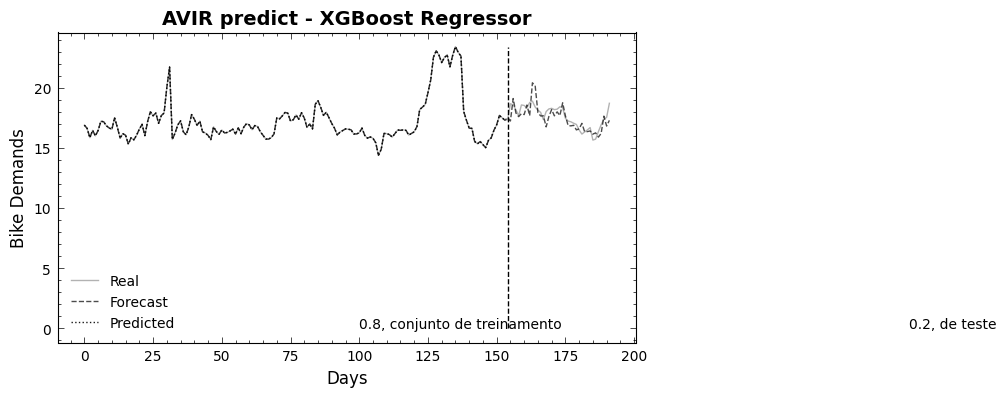

MSE: 	 0.49
MAPE: 	 0.03
ME: 	 -0.16
MAE: 	 0.55
MPE: 	 -0.01
RMSE: 	 0.70
ACF1: 	 0.04
CORR: 	 0.75


In [ ]:
plot_forecast(y, y_pred, X_train, title='AVIR predict - XGBoost Regressor')

cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['GradientBoostingRegressor'] = cur_metrics

#4

As métricas de avaliação de um modelo de previsão podem ser muitas e, em geral, não temos nenhuma métrica que defina este ou aquele modelo como o melhor em quaisquer casos. Mas você pode observar que os modelos de Aprendizado de Máquina conseguem aproximar bastante bem a série de dados do nosso exemplo quando comparado ao modelo tradicional ARIMA (veja, por exemplo o erro absoluto médio MAE) requerendo um mínimo de esforço de análise e poderíamos ainda refinar esses modelos para chegar a métricas ainda melhores, pois empregamos aqui parâmetros padrão em todos eles. Há também formas de variar os parâmetros dos modelos de modo a encontrar de forma *automática* os melhores modelos, algo que conhecemos como *Auto ML* e semelhante ao que você viu nos capítulos anteriores com o *Auto ARIMA* do pacote `pmdarima`.

## Modelos Neurais

As Redes Neurais constituem uma classe bastante específica de modelos de Aprendizado de Máquina e Redes Profundas, Deep Learning, estão em geral por traz da maior parte das aplicações modernas que envolvem grandes volumes de dados e dados multidimensionais como os exemplos da Google, YouTube e Tesla que citamos acima.    

Apesar disso o modelo de um neurônio artificial é bastante simples.

#### Neurônio Artificial: Perceptron

Um neurônio artificial implementa uma combinação linear de entradas a qual aplica uma **função de ativação** $\sigma$ para produzir uma saída.

$$ f(X) = \sigma( w_0 + w_1 x_1 + ... + w_n x_n ) $$

O treinamento do neurônio é feito ajustando-se os pesos $w_n$ para minimizar o erro de predição e estimar a saída $f(X) \cong y$.

$$ \min_{w_i} \sum || f(X)- y || $$

Semelhante aos coeficientes de uma regressão linear, aprendizado de um neurônio passa a ser um **problema de otimização** em buscar os valores $w_0, w_1, ..., w_n$ que melhor se ajustam aos dados.


###### Funções de Ativação

Combinações de operadores lineares são também lineares. Desse modo, sem uma função de ativação, as redes neurais seriam equivalentes a um modelo  linear. As funções de ativação são uma escolha importante na arquitetura de uma rede neural e facilitam a modelagem de relações mais complexas. As funções de ativação mais comuns encontram-se abaixo.

$$ f(x) = \frac{1}{(1 + e^{-x})} \quad \textrm{, Logistic } $$

$$ f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\quad \textrm{, Tanh} $$

$$ f(x) = max(0,x) \quad \textrm{, ReLu} $$

$$ f(x) = log(1 + e^{x}) \quad \textrm{, Softplus} $$

E, não sem motivo, essa função leva o mesmo nome da função neuronal que vimos antes ;-).

#### Redes Neurais

Um único neurônio artificial tem uma capacidade bastante limitada representar funções. Para aumentarmos essa capacidade e podemos ter um modelo de aproximação universal esses neurônios podem ser combinados em camadas de modo que as saídas dos neurônios de uma camada possam ser entrada para camadas seguintes de neurônios.

As camadas externas são as camadas de entrada e saída da rede. As camadas internas são as camadas de ocultas (hidden) da rede. As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas.

Essas redes são conhecidas como redes multi-camada, MLP multi-layer perceptron ou feed-forward  e as entradas são processadas em sequência, uma camada após a outra.

O problema de aprendizado do modelo é, neste caso, bastante mais complexo e é obtido em um processo de iterações e aproximações sucessivas, à exemplo de um método de gradiente para o cálculo de zero de funções. O que importa é sabermos que poderão ser encontrados um conjunto de pesos $w_{j,i}$, onde $j$ é agora a dimensão camada da rede, e que aproximarão o conjunto de dados de treinamento.


<figure>
<br>
<img src="https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Figures/nn.png" width=400, align="center">
<br>
<br>







<small>
<b>
Figura 4. Esquema de uma Rede de Neurônios Multicamada, MLP.

#### `Scikit-Learn` MLP

A biblioteca `Scikit-Learn` implementa um modelo neural multicamada MLP. A forma de aplicação é a mesma dos regressores anteriores.


In [ ]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(8), random_state=1, max_iter=2000)
reg.fit(X_train,y_train.values.reshape(-1))

y_pred = reg.predict(X)



#4_

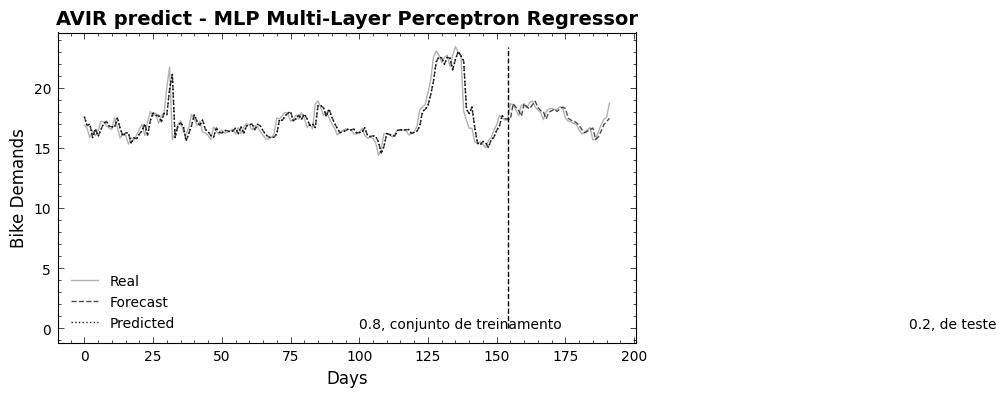

MSE: 	 0.23
MAPE: 	 0.02
ME: 	 -0.05
MAE: 	 0.36
MPE: 	 -0.00
RMSE: 	 0.48
ACF1: 	 0.09
CORR: 	 0.85


In [ ]:
plot_forecast(y, y_pred, X_train, title='AVIR predict - MLP Multi-Layer Perceptron Regressor')

cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['MLPRegressor'] = cur_metrics

In [ ]:
print('Mean Absolute Error')
print()

for key, item in dict_metrics.items():
  print(f"{key} MAE: {item['MAE']:.2f}")

Mean Absolute Error

ARIMA Model MAE: 0.36
DecisionTreeRegressor MAE: 0.88
GradientBoostingRegressor MAE: 0.55
MLPRegressor MAE: 0.36


#5

Do mesmo modo que nos modelos anteriores o modelo MLP aproxima bastante bem a série de dados e poderíamos refinar o modelo para obter resultados ainda melhores. Em vez disso, vamos entender como podemos empregar esses mesmos modelos para Séries Multivariadas, isto é, adicionando uma variável exógena a exemplo do que você viu no capítulo anterior com o SARIMAX. Na verdade modelos Multivariados, são mais amplos e envolvem tanto múltiplas variáveis de entrada como de saída, mas aqui empregamos o termo unicamente denominar para Séries com mais de uma entrada.

#### Modelo MultiVariado Simples, $(x^a_t, x^b_t,...) \rightarrow x^a_{t+1}$

Suponha que você tem uma série $x_t^a$ que deseja estimar os valores, por exemplo o número de Bikes alugadas. Sabendo, entretanto, que o aluguel dessas Bikes depende das condições do clima, podemos empregar não só os valores passados da série  $x_t^a$, mas também os valores da série de clima, como a temperatura  $x_t^b$ para aprimorar a previsão da série  $x_t^a$.

$$  f: (x_{t-n}^a,x_{t-n}^b), ..., (x_{t-1}^a,x_{t-1}^b)   \rightarrow x_t^a $$

Isso é bastante simples de fazer com modelos de Aprendizado de Máquina bastando, para isso, construir esse mapeamento de entradas e saídas adicionando a nova série de entradas.

Vamos adicionar ao nosso modelo de previsão anterior os dados de velocidade do vento e verificar o quanto o nosso modelo melhora na previsão de demanda por bicicletas.

In [ ]:
import yfinance as yf

ticker = "IBB"

start_date = '2024-01-02'

ibb_df = yf.download(ticker, start=start_date)

ibb_df.Close.head()


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2024-01-02,138.070007
2024-01-03,135.919998
2024-01-04,136.520004
2024-01-05,136.119995
2024-01-08,139.389999


In [ ]:
df_wind = ml_timeseries_df(ibb_df[['Close']], n_lags=7, prefix='wind_')
df_wind.head()

,wind_t-7,wind_t-6,wind_t-5,wind_t-4,wind_t-3,wind_t-2,wind_t-1,t
0,138.070007,135.919998,136.520004,136.119995,139.389999,138.940002,137.960007,136.880005
1,135.919998,136.520004,136.119995,139.389999,138.940002,137.960007,136.880005,137.130005
2,136.520004,136.119995,139.389999,138.940002,137.960007,136.880005,137.130005,135.929993
3,136.119995,139.389999,138.940002,137.960007,136.880005,137.130005,135.929993,135.020004
4,139.389999,138.940002,137.960007,136.880005,137.130005,135.929993,135.020004,134.550003


In [ ]:
##backup

##df_wind = ml_timeseries_df(bikes[['wind_speed']], n_lags=7, prefix='wind_')
##df_wind.head()

In [ ]:
df = pd.concat([df_wind.drop(columns='t'), df],axis=1)
df.head()


,wind_t-7,wind_t-6,wind_t-5,wind_t-4,wind_t-3,wind_t-2,wind_t-1,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,138.070007,135.919998,136.520004,136.119995,139.389999,138.940002,137.960007,17.040001,16.219999,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999
1,135.919998,136.520004,136.119995,139.389999,138.940002,137.960007,136.880005,16.219999,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001
2,136.520004,136.119995,139.389999,138.940002,137.960007,136.880005,137.130005,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000
3,136.119995,139.389999,138.940002,137.960007,136.880005,137.130005,135.929993,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000,16.459999
4,139.389999,138.940002,137.960007,136.880005,137.130005,135.929993,135.020004,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000,16.459999,16.000000


In [ ]:
X = df.drop(columns='t')
y = df[['t']]

X_train, y_train, X_test, y_test = split_train_test(X, y, test_perc=0.2)

In [ ]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(8,16,8), random_state=1, max_iter=2000)
reg.fit(X_train,y_train.values.reshape(-1))

y_pred = reg.predict(X)

#5_

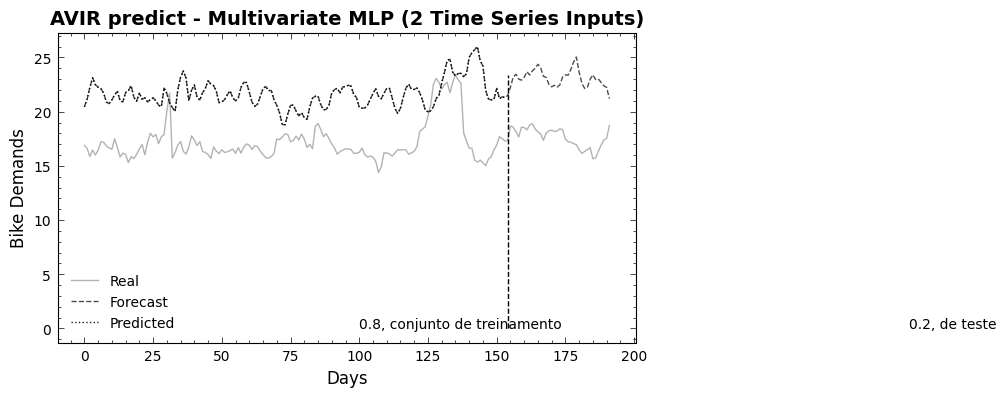

MSE: 	 31.15
MAPE: 	 0.31
ME: 	 5.44
MAE: 	 5.44
MPE: 	 0.31
RMSE: 	 5.58
ACF1: 	 0.73
CORR: 	 -0.05


In [ ]:
plot_forecast(y, y_pred, X_train, title='AVIR predict - Multivariate MLP (2 Time Series Inputs)')

cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['MLPRegressor with 2 input series'] = cur_metrics

In [ ]:
print('Mean Absolute Error')
print()

for key, item in dict_metrics.items():
  print(f"{key} MAE: {item['MAE']:.2f}")

Mean Absolute Error

ARIMA Model MAE: 0.36
DecisionTreeRegressor MAE: 0.88
GradientBoostingRegressor MAE: 0.55
MLPRegressor MAE: 0.36
MLPRegressor with 2 input series MAE: 5.44


#6

Nosso resultado agora é até mesmo melhor que o modelo unidimensional ARIMA e você pode ver que pudemos adaptar o modelo com o mínimo de esforço.

#### Deep Learning

Séries Multivariadas e janelas de ciclo de tempo muito longas podem levar à necessidade de construirmos conjuntos de dados de muitas dimensões para podermos aplicar modelos de ML. Tratar grandes volumes de dados com alta dimensionalidade exige capacidade de processamento e otimizações de código que você encontra normalmente em Frameworks de redes profundas como o `PyTorch` (Meta) ou o `TensorFlow`(Google), ou mesmo no pacote de Séries Temporais da Meta, o `NeuralProphet`.

A construção detalhada desses modelos de Deep Learning e o uso desses Frameworks estão bem além do que caberia nesta introdução, mas dada a importância e o uso cada vez maior desses modelos, cabe ao menos criarmos um modelo simples, seguindo a nossa filosofia de criar uma porta de entrada à você para modelos mais sofisticados, mas sem entrar em detalhes da codificação que você poderá buscar mais adiante em outras referências.

Vamos empregar aqui o Framework `PyTorch`, sendo um dos mais empregados e bem-sucedidos Frameworks de redes profundas. Redes profundas normalmente são associadas a um grande número de camadas e  elementos. Na verdade, não é exatamente assim e podemos encontrar redes Deep Learning que tenham mesmo um número pequeno de elementos e camadas (para os padrões de centenas e milhares que em geral encontramos). Uma das possibilidades que torna o uso de redes neurais profundas particularmente interessantes para a predição de Séries Temporais é que podemos implementar arquiteturas recorrentes em que a saída da rede realimenta a rede, podendo-se definir ainda a profundidade dessa realimentação. Você deve notar a semelhança disso com o próprio conceito de Séries Temporais.

No modelo a seguir empregaremos uma arquitetura **LSTM**, ou **Long Short-Term Memory**, que é uma arquitetura de rede neural recorrente artificial capaz de processar sequências inteiras de dados. Vamos fazer aqui uma predição empregando unicamente a Série de Dados de demanda de bicicletas. O código apresenta uma série de desafios técnicos para o iniciante e sugiro você seguir, em um primeiro momento, apenas os comentários do que cada parte está construindo.



###### Imports

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

###### Preparação dos Dados

Os dados serão organizados do mesmo modo que empregamos antes, embora existam, no caso das redes LSTM outras formas mais eficientes de empregarmos.

In [ ]:
df = ml_timeseries_df(bikes[['cnt']], n_lags=7)
df.head(7)

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,17.040001,16.219999,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999
1,16.219999,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001
2,16.610001,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000
3,16.549999,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000,16.459999
4,18.250000,17.309999,17.480000,16.889999,16.620001,15.850000,16.459999,16.000000
5,17.309999,17.480000,16.889999,16.620001,15.850000,16.459999,16.000000,16.450001
6,17.480000,16.889999,16.620001,15.850000,16.459999,16.000000,16.450001,17.209999


Modelos de Deep Learning empregam os dados no formato de **Tensores** que são arrays multidimensionais bastante semelhantes aos empregados no `NumPy` mas que possuem algoritmos mais eficientes para o processamento além de acesso a recursos de GPU. Nesses modelos dos dados de entrada e saída são em geral normalizados.

In [ ]:
min = df.min().min()
max = df.max().max()

In [ ]:
for c in df:
  df[c] = ( df[c] - min ) / ( max - min )

Dados normalizados:

In [ ]:
df.head(7)

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.294248,0.203540,0.246681,0.240044,0.428097,0.324115,0.342920,0.277655
1,0.203540,0.246681,0.240044,0.428097,0.324115,0.342920,0.277655,0.247788
2,0.246681,0.240044,0.428097,0.324115,0.342920,0.277655,0.247788,0.162611
3,0.240044,0.428097,0.324115,0.342920,0.277655,0.247788,0.162611,0.230088
4,0.428097,0.324115,0.342920,0.277655,0.247788,0.162611,0.230088,0.179204
5,0.324115,0.342920,0.277655,0.247788,0.162611,0.230088,0.179204,0.228982
6,0.342920,0.277655,0.247788,0.162611,0.230088,0.179204,0.228982,0.313053


Armazenados como Tensores e separados nos conjuntos de Treinamento e Teste como antes. Note a dimensão dos Tensores.

In [ ]:
X = df.drop(columns='t')
y = df[['t']]

X = torch.tensor(np.array(X)).unsqueeze(-1)
y = torch.tensor(np.array(y))

X = X.type(torch.float)
y = y.type(torch.float)

X_train, y_train, X_test, y_test = split_train_test(X, y, test_perc=0.2)

In [ ]:
X.shape

torch.Size([192, 7, 1])

In [ ]:
y.shape

torch.Size([192, 1])

###### Modelo da Rede e Treinamento

As duas funções a seguir são modelos bastante típicos de definição de uma rede e do seu treinamento e você, se tiver interesse, pode encontrar inúmeras referências e tutoriais dessas funções no site do projeto https://pytorch.org/.

######## Classe de Definição da Rede LSTM

In [ ]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, (h_out, cn) = self.lstm(x)

        h_out = h_out[-1]                         ## saída da última camada para a camada fc
        h_out = h_out.view(-1,self.hidden_size)
        out_final = self.fc(h_out)

        return out_final

######## Classe de Treinamento da Rede

De modo análogo a um modelo neural em camadas o aprendizado, ou o ajuste dos pesos da rede, se dá de forma iterativa e emprega um otimizador que busca a cada etapa do treinamento encontrar valores para os pesos que minimizem o erro de saída do modelo.

In [ ]:
def train(model, optmizer, loss_f, num_epochs, data_train_x, data_train_y):

  for epoch in range(num_epochs):

    outputs = model(data_train_x)
    loss = loss_f(outputs, data_train_y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    if epoch % 500 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1 ## input size!!! uma única série de dados
hidden_size = 8

for num_layers in range(2,3):

  model = LSTM(input_size, hidden_size, num_layers)

  loss_function = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  train(model, optimizer, loss_function, num_epochs, X_train, y_train)

  model.eval()


Epoch: 0, loss: 0.28797
Epoch: 500, loss: 0.00338
Epoch: 1000, loss: 0.00285
Epoch: 1500, loss: 0.00269


In [ ]:
prediction = model(X)
data_predict = prediction.data.numpy()


#6_

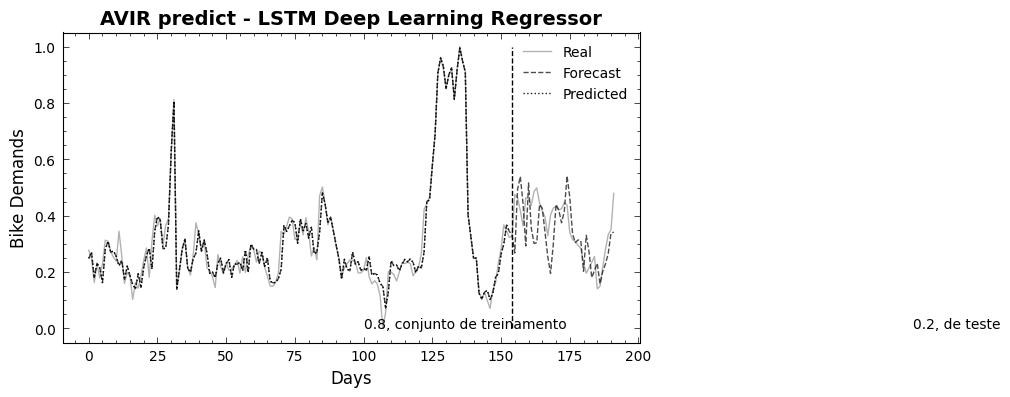

In [ ]:
LSTM_graf = plot_forecast(df[['t']] , data_predict, X_train, title='AVIR predict - LSTM Deep Learning Regressor')
LSTM_graf

Para obtermos as métricas nas mesmas medidas dos modelos anteriores vamos reescalar novamente os dados voltando aos valores originais antes da normalização.

In [ ]:
y_forecast = data_predict[train_size::].reshape(-1) * (max - min) + min
y_real = np.array( y[train_size::] ).reshape(-1) * (max - min) + min

cur_metrics = forecast_accuracy(y_forecast, y_real)

dict_metrics['LSTM Deep Learning Regressor'] = cur_metrics

MSE: 	 0.62
MAPE: 	 0.03
ME: 	 -0.22
MAE: 	 0.59
MPE: 	 -0.01
RMSE: 	 0.79
ACF1: 	 0.42
CORR: 	 0.64


In [ ]:
dict_metrics['LSTM Deep Learning Regressor']

{'MSE': 0.62337327,
 'MAPE': 0.03347884,
 'ME': -0.2187841,
 'MAE': 0.59256446,
 'MPE': -0.011456997,
 'RMSE': 0.7895399103495593,
 'ACF1': 0.41637352595612515,
 'CORR': 0.6444291661030235}

---

Resumo